                                              Mini-Projeto 1
                  Análise de Vendas Para Loja de E-commerce com NumPy, Pandas e Matplotlib

## 1. Definição do Problema de Negócio

**1.1. O Problema de Negócio**

Nossa loja de e-commerce está em fase de crescimento, registrando um volume cada vez maior de transações diárias. No entanto, essa grande quantidade de dados de vendas, em seu estado bruto, é como um baú de tesouro trancado: sabemos que há valor ali, mas não conseguimos acessá-lo.

Atualmente, muitas de nossas decisões estratégicas são baseadas em intuição e observações parciais, o que nos leva a enfrentar os seguintes desafios:

- Gestão de Estoque Ineficiente: Não temos clareza sobre quais produtos são nossos "campeões de venda" e quais estão parados nas prateleiras. Isso resulta em excesso de estoque de itens de baixa procura e falta de produtos de alta demanda.

- Marketing com Baixo Retorno: Nossas campanhas de marketing são genéricas, pois não sabemos quais categorias de produtos atraem mais os clientes ou em quais regiões geográficas nosso público está mais concentrado.

- Perda de Oportunidades Sazonais: Não conseguimos identificar padrões ou tendências de vendas ao longo dos meses. Isso nos impede de planejar promoções estratégicas para períodos de alta ou de criar ações para impulsionar as vendas em meses de baixa.

- Expansão sem Direção: Temos o desejo de expandir, mas não sabemos quais mercados regionais são mais promissores ou onde nossos esforços logísticos deveriam ser focados.

O problema central é a falta de visibilidade clara sobre a performance do negócio, o que nos impede de tomar decisões rápidas, inteligentes e baseadas em evidências.

**1.2. Objetivos do Projeto**

Este projeto de análise de dados visa transformar nossos dados brutos de vendas em insights acionáveis. O objetivo é responder a quatro perguntas de negócio fundamentais:

- O que vender? Identificar os produtos de maior sucesso para otimizar nosso portfólio e estoque.
<!-- Trabalho Desenvolvido no Curso da Data Science Academy - www.datascienceacademy.com.br -->
- Onde focar? Compreender quais categorias de produtos geram a maior parte da nossa receita.

- Quando agir? Analisar a performance de vendas ao longo do tempo para identificar tendências, picos e sazonalidades.

- Para onde expandir? Mapear a distribuição geográfica de nossas vendas para descobrir nossos mercados mais fortes.

**1.3. Solução Proposta**

A solução consiste em consolidar, limpar e analisar o histórico de dados de vendas da nossa plataforma. Utilizando ferramentas de análise de dados (como Python com Pandas, NumPy e Matplotlib), vamos processar essas informações e criar um relatório visual que apresente as descobertas de forma clara e intuitiva para as equipes de gestão, marketing e operações.

**1.4. Resultados Esperados e Benefícios de Negócio**

Ao final deste projeto, esperamos alcançar os seguintes resultados:

- Otimização de Estoque: Com a lista dos produtos mais e menos vendidos, poderemos ajustar nossas compras, reduzir custos com armazenamento e evitar a perda de vendas por falta de produto.

- Marketing Direcionado e Eficaz: Sabendo quais categorias e regiões são mais lucrativas, a equipe de marketing poderá criar campanhas segmentadas, aumentando o retorno sobre o investimento (ROI).

- Planejamento Estratégico: A visualização das tendências mensais permitirá um melhor planejamento financeiro, promocional e de recursos, antecipando períodos de alta e baixa demanda.

- Decisões Baseadas em Dados: Substituiremos a intuição por dados concretos, criando uma cultura orientada a dados que impulsionará o crescimento sustentável do negócio.

## 2. Importação das Bibliotecas

In [8]:
# Instala o pacote watermark
# Funcionalidade: watermark fornece a magia %watermark que exibe informações do ambiente (Python, IPython, bibliotecas, etc.)
# e permite adicionar um texto de autor.
!pip install -q -U watermark

In [9]:
# Importação da biblioteca para manipulação de dados em tabelas
import pandas as pd  

# Importação da biblioteca NumPy para operações matemáticas e arrays
import numpy as np  

# Importação da biblioteca Matplotlib para geração de gráficos
import matplotlib.pyplot as plt  

# Importação da biblioteca Seaborn para visualização estatística de dados
import seaborn as sns  

# Importação da biblioteca random para geração de números aleatórios
import random  

# Importação das classes datetime e timedelta para manipulação de datas e intervalos de tempo
from datetime import datetime, timedelta  

# Comando mágico do Jupyter Notebook que permite exibir gráficos diretamente no notebook
%matplotlib inline  

In [10]:
# Recarrega a extensão "watermark", que permite mostrar informações
# sobre o ambiente (autor, versão do Python, bibliotecas, data/hora etc.)
# %reload_ext watermark  

# Usa a extensão "watermark" para exibir informações.
# -a "Data Science Academy" → adiciona o nome do autor mostrado.
# %watermark -a "Data Science Academy"

%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [11]:
# %watermark → é a extensão que exibe informações sobre o ambiente do notebook.

# --iversions → mostra a versão de todas as bibliotecas que já foram importadas no notebook até aquele momento.

%watermark --iversions

pandas    : 2.3.1
matplotlib: 3.9.2
seaborn   : 0.13.2
numpy     : 1.26.4



In [12]:
# Para instalar uma versão específica de um pacote, podemos fazer assim (por exemplo):
!pip install -q pandas==2.3.1

## 3. Função Para Geração de Dados Fictícios

Excelente forma de praticar muito do que vimos até aqui neste capítulo.

In [13]:
# Definição da função para gerar dados fictícios de vendas
def dsa_gera_dados_ficticios(num_registros = 600):
    
    """
    Gera um DataFrame do Pandas com dados de vendas fictícios.
    """

    # Mensagem inicial indicando a quantidade de registros a serem gerados
    print(f"\nIniciando a geração de {num_registros} registros de vendas...")

    # Dicionário com produtos, suas categorias e preços
    produtos = {
        'Laptop Gamer': {'categoria': 'Eletrônicos', 'preco': 7500.00},
        'Mouse Vertical': {'categoria': 'Acessórios', 'preco': 250.00},
        'Teclado Mecânico': {'categoria': 'Acessórios', 'preco': 550.00},
        'Monitor Ultrawide': {'categoria': 'Eletrônicos', 'preco': 2800.00},
        'Cadeira Gamer': {'categoria': 'Móveis', 'preco': 1200.00},
        'Headset 7.1': {'categoria': 'Acessórios', 'preco': 800.00},
        'Placa de Vídeo': {'categoria': 'Hardware', 'preco': 4500.00},
        'SSD 1TB': {'categoria': 'Hardware', 'preco': 600.00}
    }

    # Cria uma lista apenas com os nomes dos produtos
    # Obtém todas as chaves como uma lista list(produtos.keys())
    # Se quiser apenas os valores (preços), use: list(produtos.values())
    lista_produtos = list(produtos.keys())

    # Dicionário com cidades e seus respectivos estados
    cidades_estados = {
        'São Paulo': 'SP', 'Rio de Janeiro': 'RJ', 'Belo Horizonte': 'MG',
        'Porto Alegre': 'RS', 'Salvador': 'BA', 'Curitiba': 'PR', 'Fortaleza': 'CE'
    }

    # Cria uma lista apenas com os nomes das cidades
    lista_cidades = list(cidades_estados.keys())

    # Lista que armazenará os registros de vendas
    dados_vendas = []

    # Define a data inicial dos pedidos
    data_inicial = datetime(2026, 1, 1)

    # Loop para gerar os registros de vendas
    # for → para (conceitualmente)
    # in → em (conceitualmente)
    # range → a própria função que gera uma sequência de números.
    for i in range(num_registros):
        
        # Seleciona aleatoriamente um produto
        produto_nome = random.choice(lista_produtos)

        # Seleciona aleatoriamente uma cidade
        cidade = random.choice(lista_cidades)

        # Gera uma quantidade de produtos vendida entre 1 e 7
        quantidade = np.random.randint(1, 8)

        # Calcula a data do pedido a partir da data inicial
        # Calcula a data do pedido:
        # - Avança 1 dia a cada 5 registros (int(i/5))
        # - Define uma hora aleatória entre 0h e 23h
        # - Somando ao ponto de partida (data_inicial)
        # Resultado: até 5 vendas por dia, em horários variados
        data_pedido = data_inicial + timedelta(days = int(i/5), hours = random.randint(0, 23))

        # Se o produto for Mouse ou Teclado, aplica desconto aleatório de até 10%
        if produto_nome in ['Mouse Vertical', 'Teclado Mecânico']:
            preco_unitario = produtos[produto_nome]['preco'] * np.random.uniform(0.9, 1.0)
        else:
            preco_unitario = produtos[produto_nome]['preco']

        # Adiciona um registro de venda fictício na lista "dados_vendas"
        dados_vendas.append({
                        'ID_Pedido'   : 1000 + i,                               # Identificador único do pedido
                        'Data_Pedido' : data_pedido,                            # Data e hora da venda
                        'Nome_Produto': produto_nome,                           # Nome do produto vendido
                        'Categoria'   : produtos[produto_nome]['categoria'],    # Categoria do produto
                        'Preco_Unitario': round(preco_unitario, 2),             # Preço unitário (com desconto se aplicável)
                        'Quantidade'  : quantidade,                             # Quantidade vendida
                        'ID_Cliente'  : np.random.randint(100, 150),            # ID aleatório do cliente
                        'Cidade'      : cidade,                                 # Cidade da compra
                        'Estado'      : cidades_estados[cidade]                 # Estado correspondente
})

    # Mensagem final indicando que a geração terminou
    print("Geração de dados concluída.\n")

    # Retorna os dados no formato de DataFrame
    return pd.DataFrame(dados_vendas)

## 4. Gerar, Carregar e Explorar os Dados

In [14]:
# Gera os dados chamando a função da célula anterior
df_vendas = dsa_gera_dados_ficticios(500)


Iniciando a geração de 500 registros de vendas...
Geração de dados concluída.



In [15]:
# # Verifica o tipo da variável df_vendas
# A saída deve ser <class 'pandas.core.frame.DataFrame'>,
# confirmando que os dados estão armazenados como um DataFrame do Pandas
type(df_vendas)

pandas.core.frame.DataFrame

In [16]:
# Shape
# Retorna uma tupla (n_linhas, n_colunas)
# Exemplo: (600, 9) → 600 registros de vendas e 9 colunas de atributos
df_vendas.shape

(500, 9)

In [17]:
# Exibe as 5 primeiras linhas do DataFrame
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
0,1000,2026-01-01 02:00:00,Monitor Ultrawide,Eletrônicos,2800.0,7,141,Rio de Janeiro,RJ
1,1001,2026-01-01 16:00:00,Monitor Ultrawide,Eletrônicos,2800.0,7,134,Belo Horizonte,MG
2,1002,2026-01-01 13:00:00,SSD 1TB,Hardware,600.0,2,104,Porto Alegre,RS
3,1003,2026-01-01 02:00:00,Cadeira Gamer,Móveis,1200.0,4,107,Fortaleza,CE
4,1004,2026-01-01 20:00:00,Monitor Ultrawide,Eletrônicos,2800.0,7,119,Curitiba,PR


In [18]:
# Exibe as 5 últimas linhas do DataFrame
df_vendas.tail()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
495,1495,2026-04-10 03:00:00,Cadeira Gamer,Móveis,1200.00,3,101,Belo Horizonte,MG
496,1496,2026-04-10 14:00:00,Laptop Gamer,Eletrônicos,7500.00,5,125,Belo Horizonte,MG
497,1497,2026-04-10 13:00:00,Mouse Vertical,Acessórios,225.78,2,112,Porto Alegre,RS
498,1498,2026-04-10 04:00:00,Placa de Vídeo,Hardware,4500.00,4,102,Curitiba,PR
499,1499,2026-04-10 08:00:00,Teclado Mecânico,Acessórios,522.98,3,102,Fortaleza,CE


In [19]:
# Exibe informações gerais sobre o DataFrame (tipos de dados, valores não nulos)
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       500 non-null    int64         
 1   Data_Pedido     500 non-null    datetime64[ns]
 2   Nome_Produto    500 non-null    object        
 3   Categoria       500 non-null    object        
 4   Preco_Unitario  500 non-null    float64       
 5   Quantidade      500 non-null    int64         
 6   ID_Cliente      500 non-null    int64         
 7   Cidade          500 non-null    object        
 8   Estado          500 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 35.3+ KB


In [20]:
# Resumo estatístico
df_vendas.describe()

,ID_Pedido,Data_Pedido,Preco_Unitario,Quantidade,ID_Cliente
count,500.000000,500,500.000000,500.000000,500.00000
mean,1249.500000,2026-02-19 23:25:33.600000,2272.165720,4.100000,123.66600
min,1000.000000,2026-01-01 02:00:00,225.210000,1.000000,100.00000
25%,1124.750000,2026-01-26 06:30:00,600.000000,2.000000,111.00000
50%,1249.500000,2026-02-20 00:30:00,800.000000,4.000000,123.00000
75%,1374.250000,2026-03-17 00:30:00,4500.000000,6.000000,137.00000
max,1499.000000,2026-04-10 14:00:00,7500.000000,7.000000,149.00000
std,144.481833,NaN,2445.178018,2.050954,14.85624


In [21]:
# Tipos de dados
# Mostra o tipo de dado de cada coluna do DataFrame:
# - object   → strings (texto)
# - int64    → números inteiros
# - float64  → números decimais
# - datetime64 → datas e horários
df_vendas.dtypes

ID_Pedido                  int64
Data_Pedido       datetime64[ns]
Nome_Produto              object
Categoria                 object
Preco_Unitario           float64
Quantidade                 int64
ID_Cliente                 int64
Cidade                    object
Estado                    object
dtype: object

In [22]:
# metodo de limpeza 
"""
Explicação Clara
Em projetos de ciência de dados e engenharia de dados, a limpeza e o tratamento de dados são etapas cruciais.
Essas etapas utilizam atributos (propriedades) e métodos (funções) de objetos Python, principalmente de bibliotecas como pandas, NumPy, scikit‑learn, datetime e re.
Abaixo, apresento uma lista organizada dos principais atributos e métodos usados para limpar e tratar dados, com exemplos de código e explicações detalhadas.

1. Atributos e Métodos de pandas.DataFrame
Atributo / Método	Descrição	Exemplo
df.head(n)	Visualiza as primeiras n linhas.	df.head(5)
df.tail(n)	Visualiza as últimas n linhas.	df.tail(3)
df.shape	Tupla (linhas, colunas).	df.shape
df.columns	Lista de nomes de colunas.	df.columns
df.dtypes	Tipos de dados de cada coluna.	df.dtypes
df.describe()	Estatísticas descritivas (média, std, min, max, quartis).	df.describe()
df.isna()	Booleano indicando valores NaN.	df.isna()
df.notna()	Complemento de isna().	df.notna()
df.dropna()	Remove linhas/colunas com NaN.	df.dropna()
df.fillna(value)	Substitui NaN por value.	df.fillna(0)
df.replace(old, new)	Substitui valores.	df.replace('N/A', np.nan)
df.astype(dtype)	Converte tipos de coluna.	df['idade'] = df['idade'].astype(int)
df.loc[mask]	Indexação baseada em rótulos.	df.loc[df['idade'] > 30]
df.iloc[mask]	Indexação baseada em posição.	df.iloc[0:5]
df.duplicated()	Identifica linhas duplicadas.	df.duplicated()
df.drop_duplicates()	Remove duplicatas.	df.drop_duplicates()
df.reset_index()	Reseta o índice.	df.reset_index(drop=True)
df.set_index(col)	Define coluna como índice.	df.set_index('id')
df.rename(columns={'old':'new'})	Renomeia colunas.	df.rename(columns={'name':'nome'})
df.sort_values('col')	Ordena por coluna.	df.sort_values('idade')
df.groupby('col').agg(...)	Agrupa e agrega.	df.groupby('sexo')['salario'].mean()
df.merge(other, on='col')	Junta DataFrames.	df.merge(outra_df, on='id')
df.pivot_table(values='val', index='id', columns='cat')	Cria tabela dinâmica.	df.pivot_table(values='vendas', index='data', columns='produto')
df.query('condição')	Filtra com expressão string.	df.query('idade > 30 and sexo == "M"')
df.sample(n)	Amostra aleatória de linhas.	df.sample(10)
df.to_csv(path)	Exporta para CSV.	df.to_csv('dados.csv')
pd.read_csv(path)	Lê CSV.	pd.read_csv('dados.csv')
2. Atributos e Métodos de pandas.Series
Atributo / Método	Descrição	Exemplo
s.unique()	Valores únicos.	s.unique()
s.value_counts()	Frequência de cada valor.	s.value_counts()
s.dropna()	Remove `Na	
"""

'\nExplicação Clara\nEm projetos de ciência de dados e engenharia de dados, a limpeza e o tratamento de dados são etapas cruciais.\nEssas etapas utilizam atributos (propriedades) e métodos (funções) de objetos Python, principalmente de bibliotecas como pandas, NumPy, scikit‑learn, datetime e re.\nAbaixo, apresento uma lista organizada dos principais atributos e métodos usados para limpar e tratar dados, com exemplos de código e explicações detalhadas.\n\n1. Atributos e Métodos de pandas.DataFrame\nAtributo / Método\tDescrição\tExemplo\ndf.head(n)\tVisualiza as primeiras n linhas.\tdf.head(5)\ndf.tail(n)\tVisualiza as últimas n linhas.\tdf.tail(3)\ndf.shape\tTupla (linhas, colunas).\tdf.shape\ndf.columns\tLista de nomes de colunas.\tdf.columns\ndf.dtypes\tTipos de dados de cada coluna.\tdf.dtypes\ndf.describe()\tEstatísticas descritivas (média, std, min, max, quartis).\tdf.describe()\ndf.isna()\tBooleano indicando valores NaN.\tdf.isna()\ndf.notna()\tComplemento de isna().\tdf.notna()\n

## 5. Limpeza, Pré-Processamento e Engenharia de Atributos

In [23]:
# Se a coluna 'Data_Pedido' não estiver como tipo datetime, precisamos fazer a conversão explícita
# A coluna pode ser usada para análise temporal
df_vendas['Data_Pedido'] = pd.to_datetime(df_vendas['Data_Pedido'])

In [24]:
# Engenharia de atributos
# Criando a coluna 'Faturamento' (preço x quantidade)
df_vendas['Faturamento'] = df_vendas['Preco_Unitario'] * df_vendas['Quantidade']

In [25]:
# Engenharia de atributos
# Usando uma função lambda para criar uma coluna de status de entrega
# Criamos uma nova coluna 'Status_Entrega' no DataFrame.
# A função lambda percorre a coluna 'Estado' linha por linha e aplica a seguinte regra:
# - Se o estado for SP, RJ ou MG → atribui "Rápida".
# - Para os demais estados → atribui "Normal".
df_vendas['Status_Entrega'] = df_vendas['Estado'].apply(lambda estado: 'Rápida' if estado in ['SP', 'RJ', 'MG'] else 'Normal')

In [26]:
# Exibe informações gerais sobre o DataFrame (tipos de dados, valores não nulos)
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       500 non-null    int64         
 1   Data_Pedido     500 non-null    datetime64[ns]
 2   Nome_Produto    500 non-null    object        
 3   Categoria       500 non-null    object        
 4   Preco_Unitario  500 non-null    float64       
 5   Quantidade      500 non-null    int64         
 6   ID_Cliente      500 non-null    int64         
 7   Cidade          500 non-null    object        
 8   Estado          500 non-null    object        
 9   Faturamento     500 non-null    float64       
 10  Status_Entrega  500 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 43.1+ KB


In [27]:
# Exibe as 5 primeiras linhas novamente para ver as novas colunas
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status_Entrega
0,1000,2026-01-01 02:00:00,Monitor Ultrawide,Eletrônicos,2800.0,7,141,Rio de Janeiro,RJ,19600.0,Rápida
1,1001,2026-01-01 16:00:00,Monitor Ultrawide,Eletrônicos,2800.0,7,134,Belo Horizonte,MG,19600.0,Rápida
2,1002,2026-01-01 13:00:00,SSD 1TB,Hardware,600.0,2,104,Porto Alegre,RS,1200.0,Normal
3,1003,2026-01-01 02:00:00,Cadeira Gamer,Móveis,1200.0,4,107,Fortaleza,CE,4800.0,Normal
4,1004,2026-01-01 20:00:00,Monitor Ultrawide,Eletrônicos,2800.0,7,119,Curitiba,PR,19600.0,Normal


## 6. Análise 1 - Top 10 Produtos Mais Vendidos
<!-- Trabalho Desenvolvido no Curso da Data Science Academy - www.datascienceacademy.com.br -->
Quais os top 10 produtos mais vendidos?

In [28]:
# Agrupa por nome do produto, soma a quantidade e ordena para encontrar os mais vendidos
# Agrupa as vendas por 'Nome_Produto'
# Para cada produto, soma a coluna 'Quantidade'
# Em seguida, ordena os produtos pelas quantidades em ordem decrescente
# Por fim, seleciona apenas os 10 produtos mais vendidos
top_10_produtos = df_vendas.groupby('Nome_Produto')['Quantidade'].sum().sort_values(ascending = False).head(10)

In [29]:
# Exibe o resultado
top_10_produtos

Nome_Produto
SSD 1TB              315
Laptop Gamer         284
Placa de Vídeo       269
Mouse Vertical       256
Headset 7.1          238
Monitor Ultrawide    238
Cadeira Gamer        227
Teclado Mecânico     223
Name: Quantidade, dtype: int64

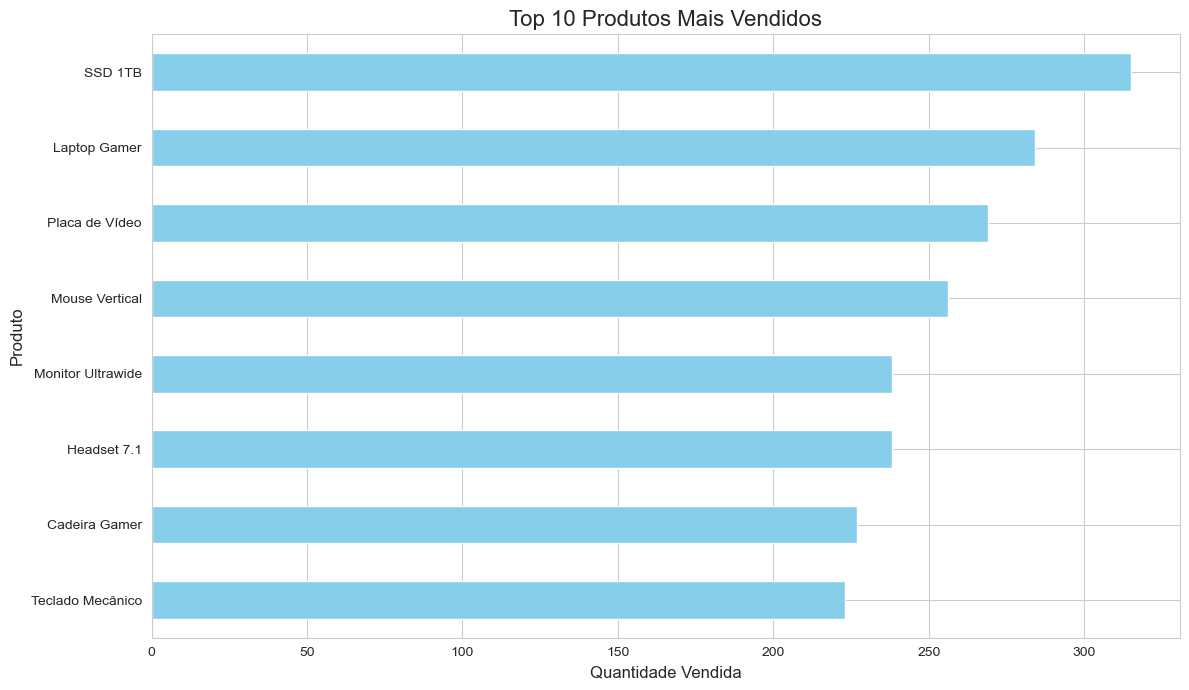

In [30]:
# Define um estilo visual para os gráficos do Seaborn
sns.set_style("whitegrid")

# Cria uma nova figura para o gráfico, definindo o tamanho (largura=12, altura=7)
plt.figure(figsize = (12, 7))

# Cria o gráfico de barras horizontais com os 10 produtos mais vendidos
# O sort_values(ascending=True) inverte a ordem para que o menor fique embaixo
# O parâmetro 'kind = barh' indica gráfico de barras horizontais
# A cor das barras é definida como 'skyblue'
top_10_produtos.sort_values(ascending = True).plot(kind = 'barh', color = 'skyblue')

# Adiciona título ao gráfico e ajusta o tamanho da fonte
plt.title('Top 10 Produtos Mais Vendidos', fontsize = 16)

# Define o rótulo do eixo X (quantidade vendida)
plt.xlabel('Quantidade Vendida', fontsize = 12)

# Define o rótulo do eixo Y (nome do produto)
plt.ylabel('Produto', fontsize = 12)

# Ajusta automaticamente o layout para evitar sobreposição de elementos
plt.tight_layout()

# Exibe o gráfico na tela
plt.show()


## 7. Análise 2 - Faturamento Mensal

Qual foi o faturamento mensal?

In [31]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status_Entrega
0,1000,2026-01-01 02:00:00,Monitor Ultrawide,Eletrônicos,2800.0,7,141,Rio de Janeiro,RJ,19600.0,Rápida
1,1001,2026-01-01 16:00:00,Monitor Ultrawide,Eletrônicos,2800.0,7,134,Belo Horizonte,MG,19600.0,Rápida
2,1002,2026-01-01 13:00:00,SSD 1TB,Hardware,600.0,2,104,Porto Alegre,RS,1200.0,Normal
3,1003,2026-01-01 02:00:00,Cadeira Gamer,Móveis,1200.0,4,107,Fortaleza,CE,4800.0,Normal
4,1004,2026-01-01 20:00:00,Monitor Ultrawide,Eletrônicos,2800.0,7,119,Curitiba,PR,19600.0,Normal


In [32]:
# Cria uma coluna 'Mes' para facilitar o agrupamento mensal
df_vendas['Mes'] = df_vendas['Data_Pedido'].dt.to_period('M')

In [33]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status_Entrega,Mes
0,1000,2026-01-01 02:00:00,Monitor Ultrawide,Eletrônicos,2800.0,7,141,Rio de Janeiro,RJ,19600.0,Rápida,2026-01
1,1001,2026-01-01 16:00:00,Monitor Ultrawide,Eletrônicos,2800.0,7,134,Belo Horizonte,MG,19600.0,Rápida,2026-01
2,1002,2026-01-01 13:00:00,SSD 1TB,Hardware,600.0,2,104,Porto Alegre,RS,1200.0,Normal,2026-01
3,1003,2026-01-01 02:00:00,Cadeira Gamer,Móveis,1200.0,4,107,Fortaleza,CE,4800.0,Normal,2026-01
4,1004,2026-01-01 20:00:00,Monitor Ultrawide,Eletrônicos,2800.0,7,119,Curitiba,PR,19600.0,Normal,2026-01


In [34]:
# Agrupa por mês e soma o faturamento
faturamento_mensal = df_vendas.groupby('Mes')['Faturamento'].sum()

In [35]:
# Converte o índice para string para facilitar a plotagem no gráfico
# Converte o índice do DataFrame 'faturamento_mensal' (que provavelmente está em formato datetime)
# para o formato de string 'YYYY-MM' (Ano-Mês).
# Isso facilita a visualização e uso em gráficos ou tabelas.
faturamento_mensal.index = faturamento_mensal.index.strftime('%Y-%m')

In [36]:
# Formata para duas casas decimais
faturamento_mensal.map('R$ {:,.2f}'.format)

Mes
2026-01    R$ 1,535,048.96
2026-02    R$ 1,435,551.49
2026-03    R$ 1,346,427.36
2026-04      R$ 518,559.71
Name: Faturamento, dtype: object

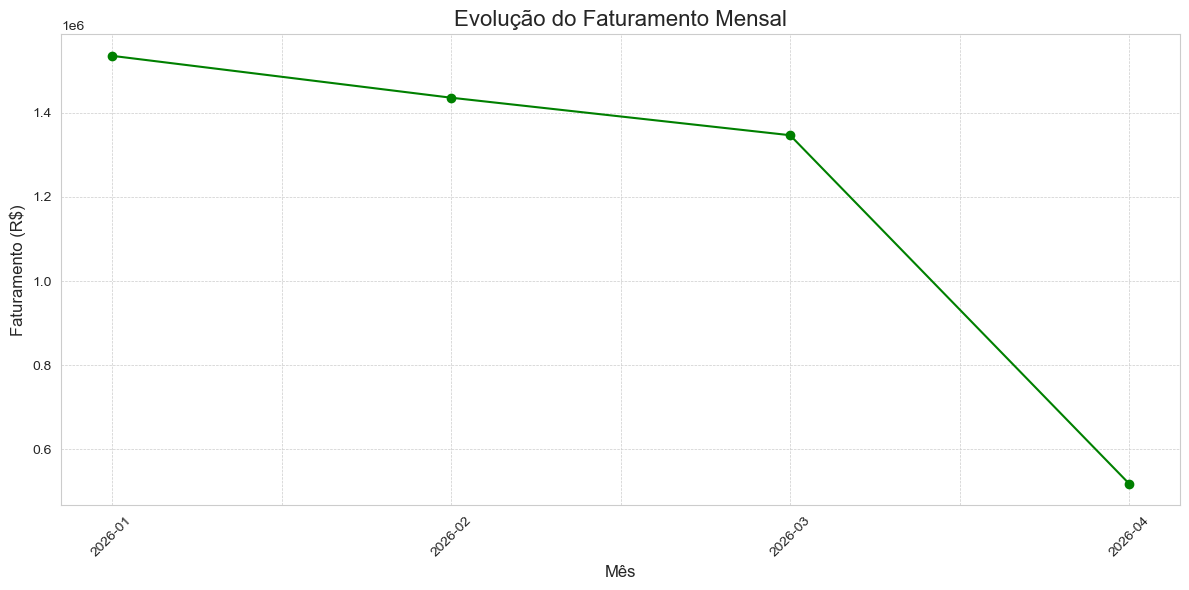

In [37]:
# Cria uma nova figura para o gráfico, definindo o tamanho em 12x6 polegadas
plt.figure(figsize = (12, 6))

# Plota os dados do DataFrame 'faturamento_mensal' em formato de linha
# - kind = 'line' → define gráfico de linha
# - marker = 'o' → coloca um círculo em cada ponto da linha
# - linestyle = '-' → linha contínua
# - color = 'green' → cor verde
faturamento_mensal.plot(kind = 'line', marker = 'o', linestyle = '-', color = 'green')

# Define o título do gráfico, com fonte de tamanho 16
plt.title('Evolução do Faturamento Mensal', fontsize = 16)

# Define o rótulo do eixo X como "Mês", com fonte de tamanho 12
plt.xlabel('Mês', fontsize = 12)

# Define o rótulo do eixo Y como "Faturamento (R$)", com fonte de tamanho 12
plt.ylabel('Faturamento (R$)', fontsize = 12)

# Rotaciona os valores do eixo X em 45° para evitar sobreposição e melhorar a leitura
plt.xticks(rotation = 45)

# Adiciona uma grade ao gráfico
# - linestyle = '--' → linhas tracejadas
# - linewidth = 0.5 → linhas finas
# - which = 'both' → aplica tanto para o eixo principal quanto secundário
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

# Ajusta automaticamente os elementos (título, rótulos, ticks) para que não fiquem sobrepostos
plt.tight_layout()

# Exibe o gráfico na tela
plt.show()


## 8. Análise 3 - Vendas Por Estado

Qual o total de vendas por estado?

In [38]:
# Agrupa por estado e soma o faturamento
vendas_estado = df_vendas.groupby('Estado')['Faturamento'].sum().sort_values(ascending = False)

In [39]:
# Formata para duas casas decimais
vendas_estado.map('R$ {:,.2f}'.format)

Estado
MG    R$ 955,050.93
PR    R$ 875,760.89
RJ    R$ 738,427.08
BA    R$ 632,685.15
RS    R$ 560,559.24
SP    R$ 557,226.60
CE    R$ 515,877.63
Name: Faturamento, dtype: object

https://seaborn.pydata.org/generated/seaborn.color_palette.html

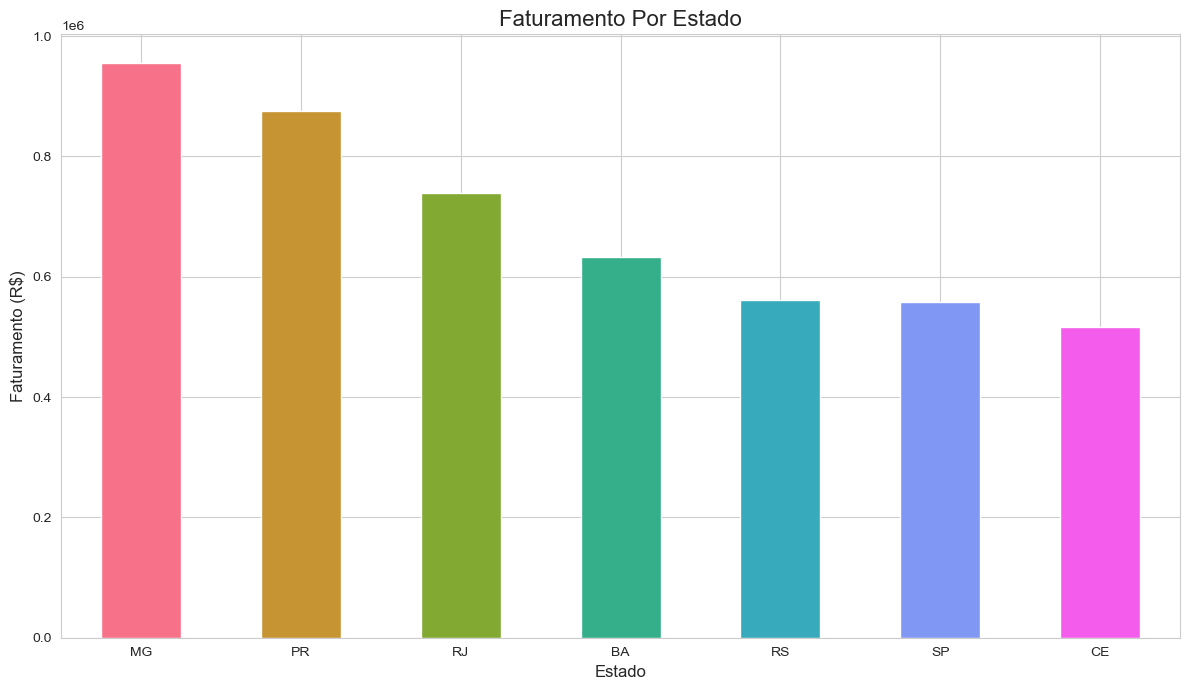

In [40]:
# Cria uma nova figura com tamanho de 12 por 7 polegadas
plt.figure(figsize = (12, 7))

# Plota os dados de faturamento por estado em formato de gráfico de barras
# Usando a paleta de cores "rocket" do Seaborn
vendas_estado.plot(kind = 'bar', color = sns.color_palette("husl", 7))

# Define o título do gráfico com fonte de tamanho 16
plt.title('Faturamento Por Estado', fontsize = 16)

# Define o rótulo do eixo X
plt.xlabel('Estado', fontsize = 12)

# Define o rótulo do eixo Y
plt.ylabel('Faturamento (R$)', fontsize = 12)

# Mantém os rótulos do eixo X na horizontal (sem rotação)
plt.xticks(rotation = 0)

# Ajusta automaticamente os elementos do gráfico para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()

## 9. Análise 4 - Faturamento Por Categoria

Qual o faturamento total por categoria?

In [41]:
# Agrupa por categoria, soma o faturamento e formata como moeda para melhor leitura
faturamento_categoria = df_vendas.groupby('Categoria')['Faturamento'].sum().sort_values(ascending = False)

In [42]:
# O .map('{:,.2f}'.format) é opcional, mas deixa a visualização do número mais clara
faturamento_categoria.map('R$ {:,.2f}'.format)

Categoria
Eletrônicos    R$ 2,796,400.00
Hardware       R$ 1,399,500.00
Acessórios       R$ 367,287.52
Móveis           R$ 272,400.00
Name: Faturamento, dtype: object

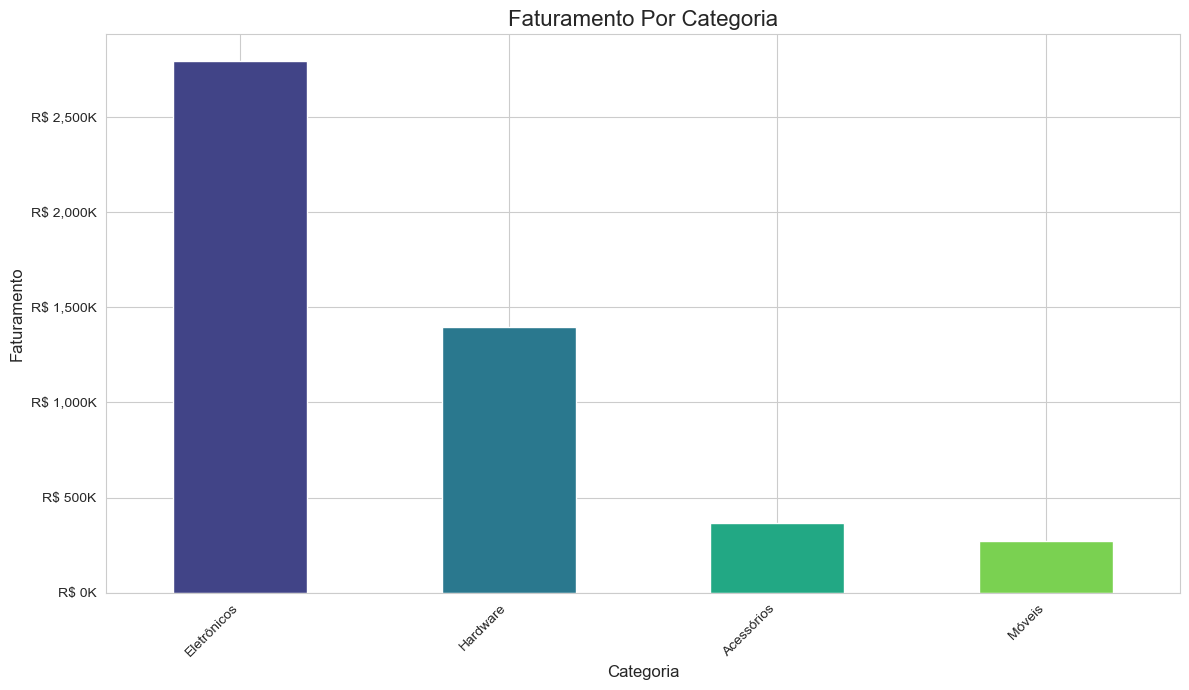

In [43]:
# Importa a função FuncFormatter para formatar os eixos
from matplotlib.ticker import FuncFormatter

# Ordena os dados para o gráfico ficar mais fácil de ler
faturamento_ordenado = faturamento_categoria.sort_values(ascending = False)

# Cria a Figura e os Eixos (ax) com plt.subplots()
# Isso nos dá mais controle sobre os elementos do gráfico.
fig, ax = plt.subplots(figsize = (12, 7))

# Cria uma função para formatar os números
# Esta função recebe um valor 'y' e o transforma em uma string no formato 'R$ XX K'
def formatador_milhares(y, pos):
    """Formata o valor em milhares (K) com o cifrão R$."""
    return f'R$ {y/1000:,.0f}K'

# Cria o objeto formatador
formatter = FuncFormatter(formatador_milhares)

# Aplica o formatador ao eixo Y (ax.yaxis)
ax.yaxis.set_major_formatter(formatter)

# Plota os dados usando o objeto 'ax'
faturamento_ordenado.plot(kind = 'bar', ax = ax, color = sns.color_palette("viridis", len(faturamento_ordenado)))

# Adiciona títulos e labels usando 'ax.set_...'
ax.set_title('Faturamento Por Categoria', fontsize = 16)
ax.set_xlabel('Categoria', fontsize = 12)
ax.set_ylabel('Faturamento', fontsize = 12)

# Ajusta a rotação dos rótulos do eixo X
plt.xticks(rotation = 45, ha = 'right')

# Garante que tudo fique bem ajustado na imagem final
plt.tight_layout()

# Exibe o gráfico
plt.show()

## 10. Conclusão e Entrega do Resultado

Existem várias formas de entregar um projeto de análise de dados e a escolha depende do público, do contexto e dos objetivos. Três formas bastante utilizadas são:

**10.1. Relatório técnico ou executivo (PDF, DOCX, etc.)**

Essa forma é clássica e muito útil quando o público precisa de um documento formal para consulta. O relatório pode conter descrição da metodologia, exploração dos dados, gráficos, tabelas e conclusões. É comum separar a linguagem: uma versão mais técnica (com código, estatísticas detalhadas e testes) e outra mais executiva (com foco em insights, recomendações e storytelling de dados).

**10.2. Dashboard interativo (Power BI, Tableau, Looker, Streamlit, Dash, etc.)**

Um dashboard permite que os usuários explorem os dados por conta própria, filtrando informações, ajustando períodos de tempo ou focando em variáveis específicas. Essa forma de entrega é muito valorizada em ambientes corporativos, pois facilita a tomada de decisão contínua e não exige conhecimentos técnicos avançados dos usuários finais.

**10.3. Apresentação (slides em PowerPoint, Google Slides, etc.)**

Ideal para reuniões de stakeholders, a entrega em formato de apresentação resume os principais pontos do projeto. Ela foca nas descobertas mais relevantes, nas implicações para o negócio e nas recomendações práticas, usando gráficos e visualizações impactantes. A ideia é contar a história dos dados de forma clara e direta, evitando sobrecarregar o público com detalhes técnicos.

Confira exemplos práticos em <a href="https://www.datascienceacademy.com.br/course/storytelling-dashboards-e-tecnicas-de-apresentacao-para-cientistas-de-dados">Storytelling, Dashboards e Técnicas de Apresentação Para Cientistas de Dados</a>

Se isto aqui é um Mini-Projeto, então o que é um projeto inteiro na DSA? Nas Formações e Programas de Pós-Graduação você vai descobrir. ;-)

# Fim